# Задача 7.2

In [1]:
import numpy as np
import math as mth
import scipy.optimize as opt
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

###### Построение графиков плотностей априорного распределения с различными параметрами
(параметры указаны на графике)

Сопряженным распределением для распределения Бернулли является бета-распределение.

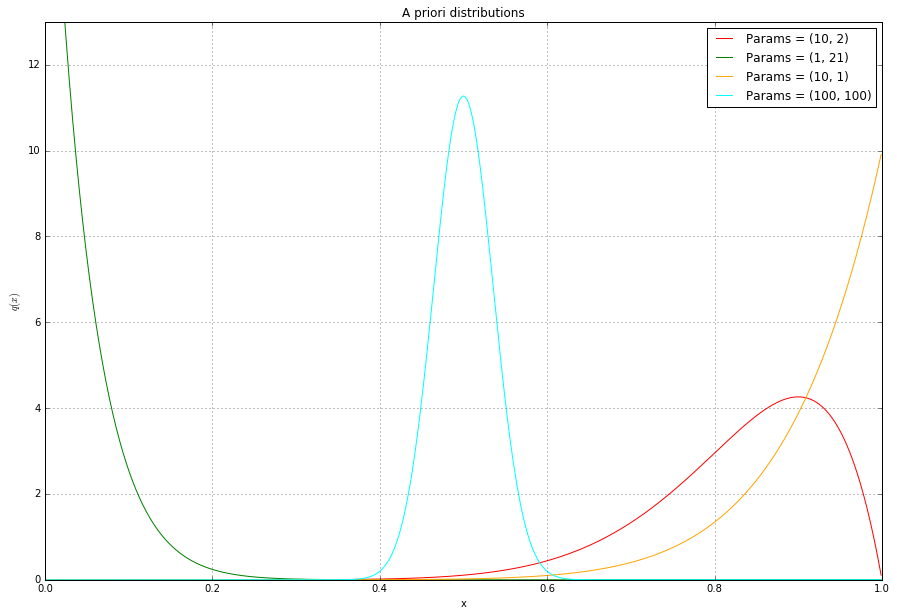

In [18]:
par = [[10,2],[1,21],[10,1],[100,100]]

grid = np.arange(0,1,0.001)
plt.figure(figsize = (15,10))
colors = ['red', 'green', 'orange', 'cyan']

for i in np.arange(4):
    plt.plot(grid, [sps.beta.pdf(x, par[i][0], par[i][1]) for x in grid], linewidth=1,\
             label = 'Params = ('+str(par[i][0])+', '+str(par[i][1])+')', color = colors[i])
plt.ylim(0, 13)
plt.title('A priori distributions')
plt.legend()
plt.grid()
plt.xlabel("x")
plt.ylabel(r"$q(x)$")
plt.show()

Итак, если параметры одинаковы, то монета скорее честна, в противном случае монета скорее нечестна, причем перевес будет в сторону 0, если больше второй параметр; в сторону единицы иначе. Этот перевес будет тем больше, чем больше разница между параметрами.

### Броски монет
Проведу испытания для значений p = 0.5 (честная), 0.2 (перевес в сторону решки) и 0.95(перевес в сторону орла).

Параметры априорных распределения возьму следующими:
(3, 3), (10, 1), (1, 10)

Оценкой максимального правдоподобия будет $\bar{X}$

Байесовской оценкой - $\frac{a + \sum X_i}{a + b + n}$

In [39]:
def bayes(param, sample):
    return float(param[0] + np.sum(sample))/(np.sum(param) + len(sample))

def ml(sample):
    return np.average(sample)

##### Построение графиков отклонения байесовских оценок от истинного значения параметра

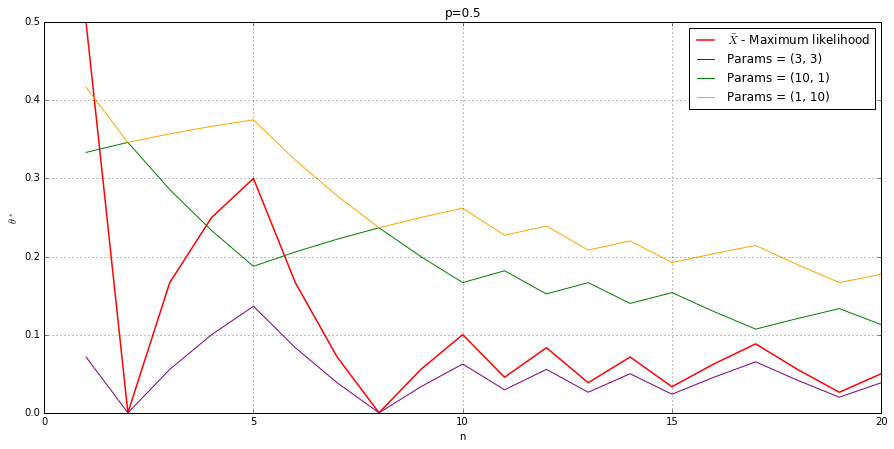

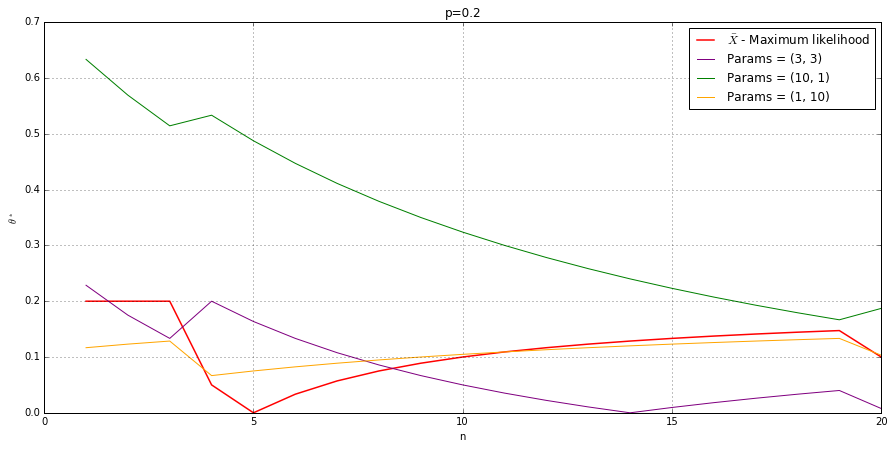

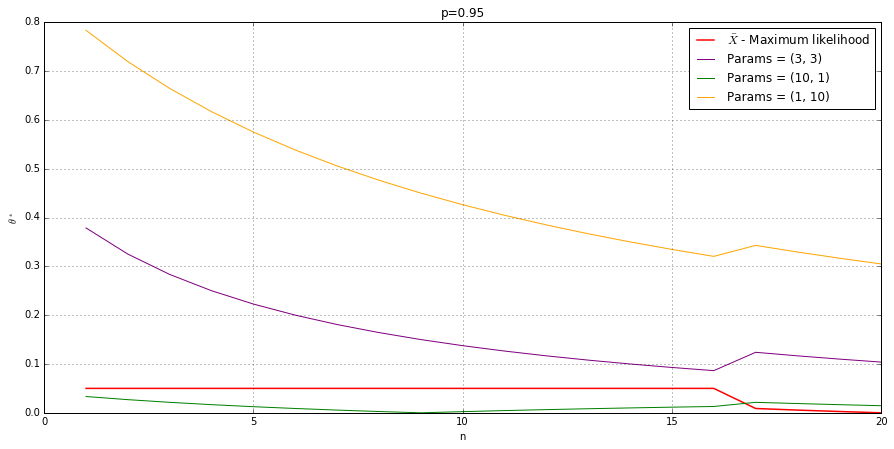

In [40]:
colors = ['purple', 'green', 'orange']
par = [[3, 3], [10, 1], [1, 10]]
p = [0.5, 0.2, 0.95]
grid = np.arange(1, 21)

for j in np.arange(3):
    plt.figure(figsize = (15,7))
    sample = np.random.binomial(n=1, p=p[j], size=20)
    plt.plot(grid, [np.abs(ml(sample[:n]) - p[j]) for n in grid] ,color='red', linewidth=1.5,\
             label = r'$\bar{X}$ - Maximum likelihood' )
    for i in np.arange(3):
        plt.plot(grid, [np.abs(bayes(par[i], sample[:n]) - p[j]) for n in grid],color=colors[i], linewidth=1,\
                 label = 'Params = ('+str(par[i][0])+', '+str(par[i][1])+')')
    plt.title('p='+str(p[j]))
    #plt.ylim(0, 1)
    plt.legend()
    plt.grid()
    plt.xlabel("n")
    plt.ylabel(r"$\theta^*$")
    plt.show()

Из графиков видно, что оценки получаются тем лучше, чем предположения о природе монеты(ее честности и смещении) более правильны.